# Heart Disease Diagnostic - Analysis

### iNeuron Internship Project

- Name:- Mainak Mukherjee
- Email:- subha.mainak@gmail.com

In [4]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Data ingestion: Extracting CSV data file using Pandas Library
df = pd.read_csv('heart_disease_dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [8]:
#Viewing the columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### Explaining the column abbreviations:

1. age: Age of the patient
2. sex: Sex of the patient (1 = male, 0 = female)
3. cp: Chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
4. trestbps: Resting blood pressure (in mm Hg)
5. chol: Serum cholesterol (in mg/dl)
6. fbs: Fasting blood sugar (> 120 mg/dl, 1 = true, 0 = false)
7. restecg: Resting electrocardiographic results (0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy)
8. thalach: Maximum heart rate achieved
9. exang: Exercise-induced angina (1 = yes, 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: Slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
12. ca: Number of major vessels (0–3) colored by fluoroscopy
13. thal: Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)
14. num: Diagnosis of heart disease (0 for no disease, 1 for yes)

In [11]:
#First five rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [13]:
#Last five rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0


In [15]:
#Rows x Columns
df.shape

(303, 14)

In [17]:
#Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
#Checking if the dataset has Null values or not
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

- There is no Null values in the dataset

In [22]:
#Checking for duplicate values
df.duplicated().sum()

0

- No duplcate values present in the dataset

In [25]:
#checking the unique values of the 'ca' column (number of vessels)
df['ca'].unique()

array([      0,       3,       2,       1, -100000], dtype=int64)

- ca: Number of major vessels (0–3) colored by fluoroscopy. So, the value -100000 is clearly an outlier as it doesn't represent a realistic number of vessels.

In [28]:
#Detecting how many outliers( -100000) are there in the 'ca' column
num_outliers = df['ca'].value_counts()[-100000]
print("Number of outliers:", num_outliers)

Number of outliers: 4


In [30]:
#Checking the median of the 'ca' column.
df['ca'].median()

0.0

- The median is a statistical measure that is not significantly affected by outliers. So, for the outlier treatment of 'ca' column, here median is used.

In [33]:
#Replacing the outliers of the 'ca' column with the median value
df['ca'].replace(-100000, df['ca'].median(), inplace=True)

In [35]:
#Re-checking the 'ca' column values
df['ca'].unique()

array([0, 3, 2, 1], dtype=int64)

In [40]:
#checking the unique values of the 'thal' column (Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect))
df['thal'].unique()

array([      6,       3,       7, -100000], dtype=int64)

- The datapoints for the 'thal' column contains outliers in the form of the value -100000, as it doesn't correspond to any of the defined categories (3, 6, or 7).

In [43]:
#Checking the median of the 'thal' column.
df['thal'].median()

3.0

- The median is a statistical measure that is not significantly affected by outliers. So, for the outlier treatment of 'thal' column, here also median is used.

In [46]:
#Replacing the outliers of the 'thal' column with the median value
df['thal'].replace(-100000, df['thal'].median(), inplace=True)

In [48]:
#Re-checking the 'thal' column values
df['thal'].unique()

array([6, 3, 7], dtype=int64)

In [50]:
#Overall Statistical analysis or Five-Point Summary
df.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [52]:
#Reviewing data types of each column
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

- The analysis of the dataset reveals that certain columns, although represented by numerical values (as int64), but they are in fact categorical variables with a defined set of classes. For instance, columns such as sex is categorical, despite being stored as numerical data.

In [55]:
#Function for converting numerical data from 'num' column to categorical data: Diagnosis of heart disease (0 for no disease, 1 for yes)
def convert(x):
    if x == 0:
        return 'Absent'
    elif x == 1:
        return 'Present'

In [57]:
#Applying the function in a new column
df['heart_disease_status'] = df['num'].apply(convert)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease_status
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Present
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,Present
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,Present
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Present


In [59]:
#Count of people with respect to status (Absent and Present)
status_count = df.groupby('heart_disease_status')['num'].count()
print(status_count)

heart_disease_status
Absent     164
Present    139
Name: num, dtype: int64


In [61]:
#Percentage of Heart disease status
percentage = df['heart_disease_status'].value_counts(normalize=True) * 100
print(percentage)

heart_disease_status
Absent     54.125413
Present    45.874587
Name: proportion, dtype: float64


- Around 54.12% People have heart disease present and 45.87% are free from any kind of heart disease

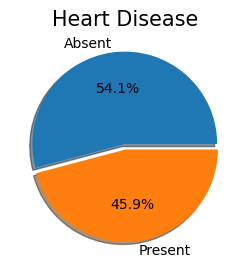

In [64]:
#Visualizing this heart disease status percentage in a pie-chart
plt.figure(figsize = (3,3))
plt.pie(status_count, labels = ['Absent', 'Present'], explode=(0.06, 0), shadow=True, autopct = '%1.1f%%')
plt.title("Heart Disease", fontsize = 15)
plt.show()

- The pie chart clearly shows the distribution of heart disease statuses among the data. Approximately 54.1% of individuals in the dataset do not have heart disease (Absent), while 45.9% of individuals are diagnosed with heart disease (Present). This indicates a relatively balanced distribution, but a slight majority of individuals are free from heart disease in the dataset.

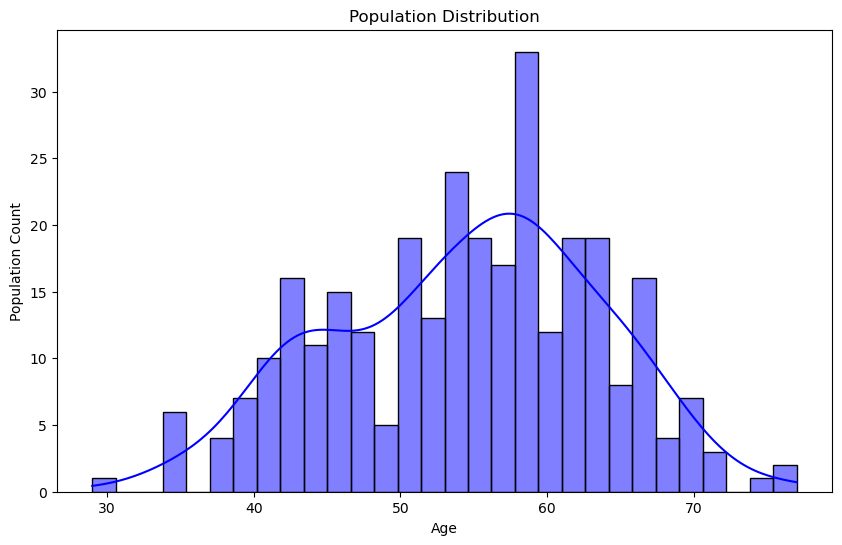

In [67]:
#Age-Based Population distribution using Histogram
plt.figure(figsize = (10,6))
sns.histplot(df['age'], kde = True, color= 'blue', bins = 30)
plt.title("Population Distribution")
plt.xlabel("Age")
plt.ylabel("Population Count")
plt.show()

- The plot shows a population heavily concentrated in the 50-60 age range, with fewer individuals below 40 and above 70.

In [70]:
#Statistical Analysis of the 'age' Column
min_age = df['age'].min()
max_age = df['age'].max()
mean_value = df['age'].mean()

print(f"The minimun age in the data is: {min_age}")
print(f"The maximum age in the data is: {max_age}")
print(f"The mean value of the Age column is: {mean_value}")

The minimun age in the data is: 29
The maximum age in the data is: 77
The mean value of the Age column is: 54.43894389438944


In [72]:
#Making 3 age group categories from the 'age' column
young_aged = df[(df['age']>= 29) & (df['age']<40)]
middle_aged = df[(df['age']>= 40) & (df['age']<55)]
elderly_aged = df[(df['age']>=55)]

print(f"Total young aged people: {len(young_aged)}")
print(f"Total middle aged people: {len(middle_aged)}")
print(f"Total elderly aged people: {len(elderly_aged)}")

Total young aged people: 15
Total middle aged people: 128
Total elderly aged people: 160


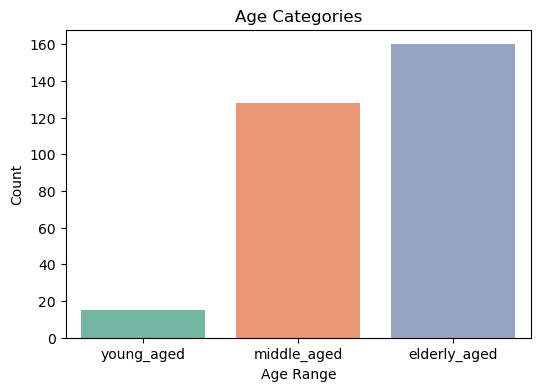

In [74]:
#Age categories using a barplot
plt.figure(figsize = (6,4))
sns.barplot(x = ['young_aged', 'middle_aged', 'elderly_aged'],
            y = [len(young_aged), len(middle_aged), len(elderly_aged)],
           palette='Set2')
plt.title("Age Categories")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

In [76]:
#Creating a new categorical column to map 0 and 1 to Female and Male
df['gender'] = df['sex'].map({0: 'Female', 1: 'Male'})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease_status,gender
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female


In [78]:
#Creating a function to convert the numerical data from age column into a categorical values
def age_cat(i):
    if i >= 29 and i <40:
        return 'young_aged'
    elif i >= 40 and i <55:
        return 'middle_aged'
    else:
        return 'elderly_aged'

In [80]:
#Applying the function and creating a new column 'age_category'
df['age_category'] = df['age'].apply(age_cat)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease_status,gender,age_category
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Absent,Male,elderly_aged
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Present,Male,elderly_aged
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Present,Male,elderly_aged
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Absent,Male,young_aged
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Absent,Female,middle_aged


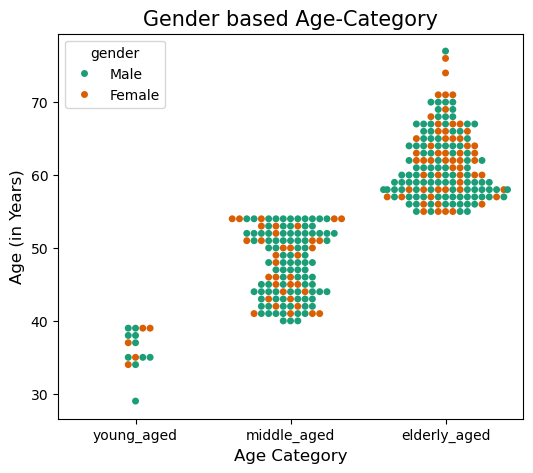

In [82]:
#Gender based age-category visualizing through a swarm plot
plt.figure(figsize = (6,5))
sns.swarmplot(x = 'age_category', y = 'age', hue = 'gender', data = df, order = ['young_aged', 'middle_aged', 'elderly_aged'], palette = 'Dark2')
plt.title("Gender based Age-Category", fontsize = 15)
plt.xlabel("Age Category", fontsize = 12)
plt.ylabel("Age (in Years)", fontsize = 12)
plt.show()

- The number of males is higher in the Middle_Aged category, while females are more dominant in the Elderly_Age category.

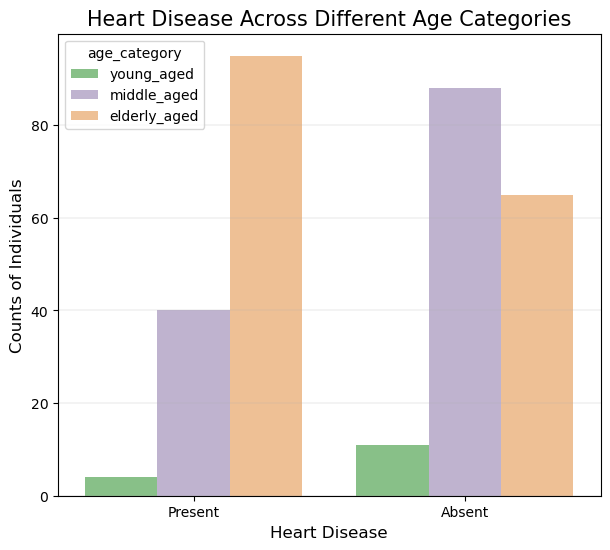

In [85]:
#Count Plot of Heart Disease by Age Category
plt.figure(figsize = (7,6))
category = ['young_aged', 'middle_aged', 'elderly_aged']
sns.countplot(x='heart_disease_status', data=df, hue='age_category', order=['Present', 'Absent'], hue_order=category, palette='Accent')
plt.title("Heart Disease Across Different Age Categories", fontsize = 15)
plt.xlabel("Heart Disease", fontsize = 12)
plt.ylabel("Counts of Individuals", fontsize = 12)
plt.grid(axis='y', linewidth=0.2)
plt.show()

- Elderly individuals are most affected by Heart Disease, and Middle-Aged individuals are least affected.

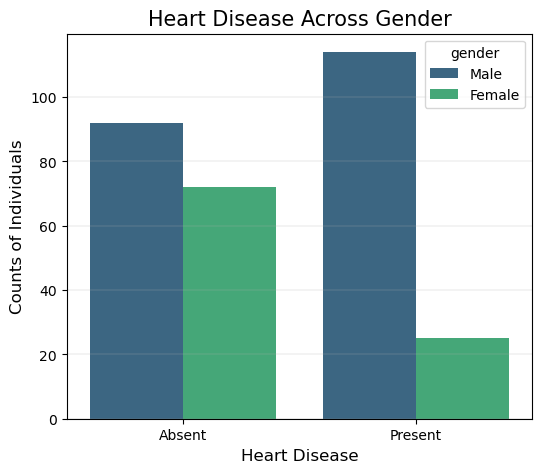

In [88]:
#Count Plot of Heart Disease by Gender
plt.figure(figsize = (6,5))
sns.countplot(x='heart_disease_status', hue='gender', data=df, palette='viridis')
plt.title("Heart Disease Across Gender", fontsize = 15)
plt.xlabel("Heart Disease", fontsize = 12)
plt.ylabel("Counts of Individuals", fontsize = 12)
plt.grid(axis='y', linewidth=0.2)
plt.show()

- The Countplot shows that Heart Disease is more prominent among Male individuals.

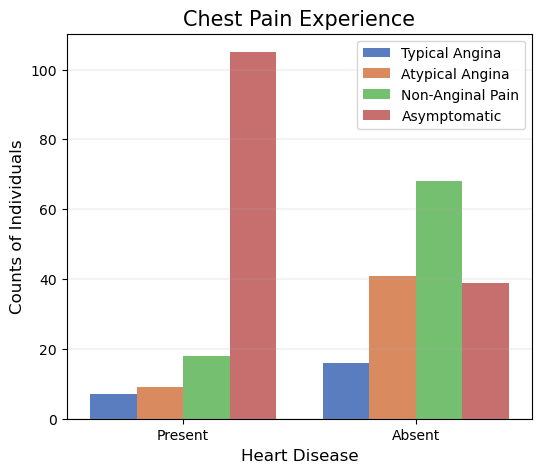

In [91]:
#Count Plot showing the distribution of chest pain experienced(cp)
plt.figure(figsize= (6,5))
sns.countplot(x='heart_disease_status', hue='cp', data=df, order=['Present','Absent'], palette='muted')
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic'])
plt.title("Chest Pain Experience", fontsize=15)
plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("Counts of Individuals", fontsize=12)
plt.grid(axis='y', linewidth=0.2)
plt.show()

- It seems that people with asymptomatic chest pain might have a higher risk of heart disease. 
- Asymptomatic chest pain means that the person does not experience any symptoms of heart disease.
- Asymptomatic chest pain is serious because it lacks noticeable symptoms, delaying diagnosis and increasing the risk of severe heart issues.

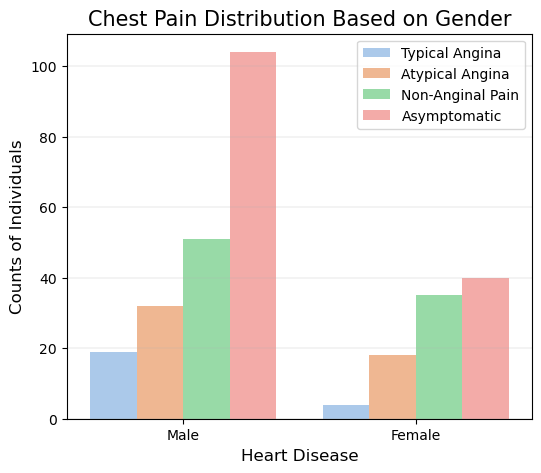

In [94]:
#Count Plot illustrating the distribution of chest pain experience by gender
plt.figure(figsize = (6,5))
sns.countplot(x='gender', hue='cp', data=df, order=['Male','Female'], palette='pastel')
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic'])
plt.title("Chest Pain Distribution Based on Gender", fontsize = 15)
plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("Counts of Individuals", fontsize=12)
plt.grid(axis='y', linewidth=0.2)
plt.show()

- The data shows that more men are experiencing asymptomatic chest pain, meaning they don’t have noticeable symptoms. 
- This finding highlights the importance of checking for potential heart issues in men, even when they feel fine.

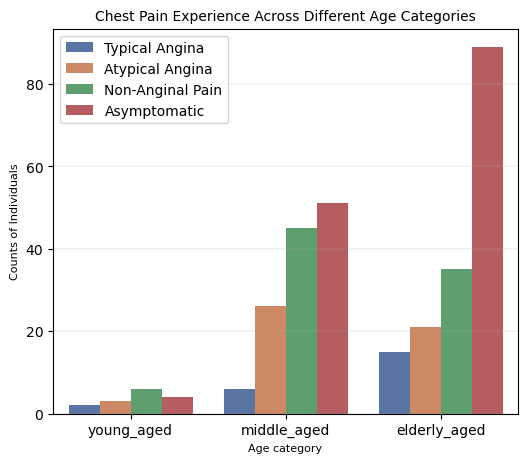

In [97]:
#Count Plot of Chest Pain Types Across Different Age Categories
plt.figure(figsize=(6,5))
sns.countplot(x='age_category', hue='cp', data=df, order=['young_aged','middle_aged','elderly_aged'], palette='deep')
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal Pain','Asymptomatic'])
plt.title("Chest Pain Experience Across Different Age Categories", fontsize = 10)
plt.xlabel("Age category", fontsize=8)
plt.ylabel("Counts of Individuals", fontsize=8)
plt.grid(axis='y', linewidth=0.2)
plt.show()

- There is a very large number of elderly people who experience asymptomatic chest pain, meaning they don't show obvious symptoms, even though they might have underlying heart issues.

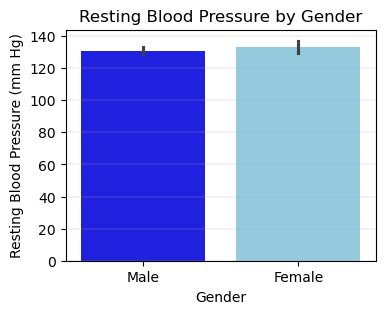

In [100]:
#Bar Plot of Gender wise Resting Blood Pressure (mm Hg)
plt.figure(figsize=(4,3))
sns.barplot(x='gender', y='trestbps', data=df, palette= ['blue', 'skyblue'])
plt.title("Resting Blood Pressure by Gender")
plt.xlabel("Gender")
plt.ylabel("Resting Blood Pressure (mm Hg)")
plt.grid(axis='y', linewidth= 0.2)
plt.show()

- The resting blood pressure is nearly the same in both males and females, with a slight increase observed in females.

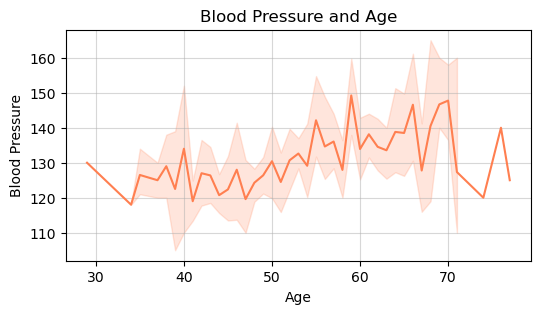

In [103]:
#Line Plot Illustrating the Relationship Between Blood Pressure and Age
plt.figure(figsize=(6,3))
sns.lineplot(x='age', y='trestbps', data=df, color='coral')
plt.grid(True, which='both', linestyle='-', alpha=0.5)
plt.title("Blood Pressure and Age")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.show()

- The line shows that blood pressure tends to increase between the ages of 50 and 60, continuing this upward trend until around age 70.

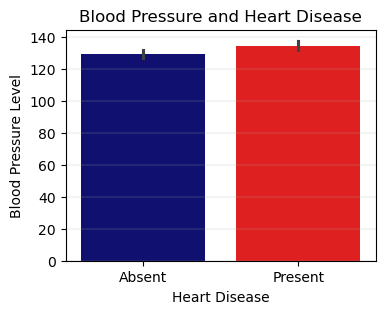

In [106]:
#Bar Plot Illustrating the Relationship Between Blood Pressure Levels and Heart Disease
plt.figure(figsize=(4,3))
sns.barplot(x='heart_disease_status', y='trestbps', data=df, palette= ['navy', 'red'])
plt.title("Blood Pressure and Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Blood Pressure Level")
plt.grid(axis='y', linewidth=0.2)
plt.show()

- Higher blood pressure levels are associated with a slightly increased risk of heart disease.

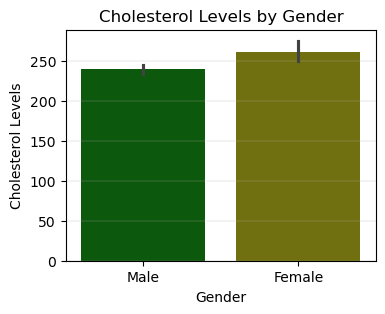

In [109]:
#Bar Plot of Cholesterol Levels by Gender
plt.figure(figsize=(4,3))
sns.barplot(x='gender', y='chol', data=df, palette= ['darkgreen', 'olive'])
plt.title("Cholesterol Levels by Gender")
plt.xlabel("Gender")
plt.ylabel("Cholesterol Levels")
plt.grid(axis='y', linewidth=0.2)
plt.show()

- Females have slightly higher cholesterol levels compared to males.

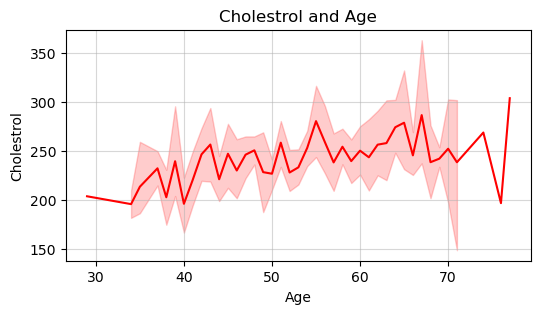

In [112]:
#Line Plot Illustrating the Relationship Between Cholestrol and Age
plt.figure(figsize=(6,3))
sns.lineplot(x='age', y='chol', data=df, color='red')
plt.grid(True, which='both', linestyle='-', alpha=0.5)
plt.title("Cholestrol and Age")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.show()

- Cholesterol levels show a significant increase in individuals aged between 50 and 60

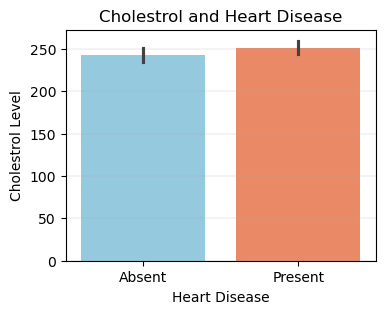

In [115]:
#Bar Plot Illustrating the Relationship Between Cholestrol Levels and Heart Disease
plt.figure(figsize=(4,3))
sns.barplot(x='heart_disease_status', y='chol', data=df, palette= ['skyblue', 'coral'])
plt.title("Cholestrol and Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Cholestrol Level")
plt.grid(axis='y', linewidth=0.2)
plt.show()

- While cholesterol doesn't strongly affect the presence of heart disease, the plot shows that higher cholesterol levels tend to increase the chances of heart disease.

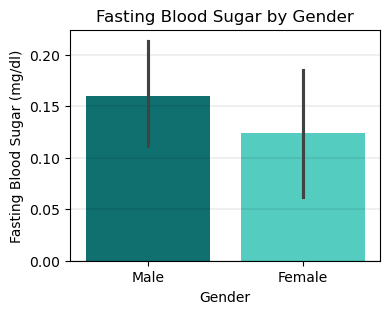

In [118]:
#Bar Plot of Fasting Blood Sugar Levels by Gender
plt.figure(figsize=(4,3))
sns.barplot(x='gender', y='fbs', data=df, palette= ['teal', 'turquoise'])
plt.title("Fasting Blood Sugar by Gender")
plt.xlabel("Gender")
plt.ylabel("Fasting Blood Sugar (mg/dl)")
plt.grid(axis='y', linewidth=0.3, color='black', alpha=0.3)
plt.show()

- The data shows that a higher number of males have fasting blood sugar levels exceeding 120 mg/dl.
- Fasting blood sugar levels exceeding 120 mg/dL may indicate pre-diabetes or diabetes, which may require medical intervention.

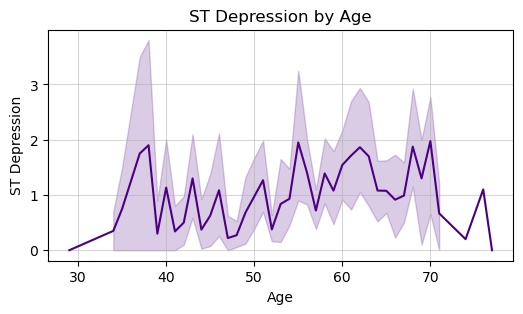

In [121]:
#Line Plot of ST Depression by Age
plt.figure(figsize=(6,3))
sns.lineplot(x='age', y='oldpeak', data=df, color='indigo')
plt.grid(True, which='both', linestyle='-', alpha=0.5)
plt.title("ST Depression by Age")
plt.xlabel("Age")
plt.ylabel("ST Depression")
plt.show()

- The plot indicates that ST depression is more pronounced in the age groups of 30-40 and near about 55.
- ST depression, observed on an electrocardiogram, occurs when the ST segment is lower than the normal level, which can signify potential cardiac issues.

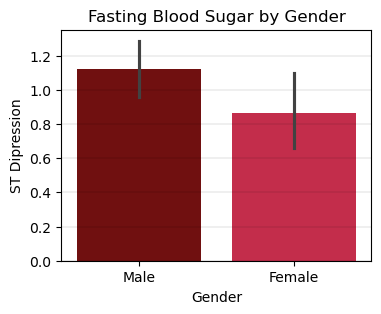

In [124]:
#Bar Plot of ST Depression by Gender
plt.figure(figsize=(4,3))
sns.barplot(x='gender', y='oldpeak', data=df, palette=['maroon', 'crimson'])
plt.title("Fasting Blood Sugar by Gender")
plt.xlabel("Gender")
plt.ylabel("ST Dipression")
plt.grid(axis='y', linewidth=0.3, color='black', alpha=0.3)
plt.show()

- The data shows that Males have higher levels of ST depression than Females.
- This suggests that Men may be more at risk for heart-related issues that can cause changes in the ST segment on an electrocardiogram.

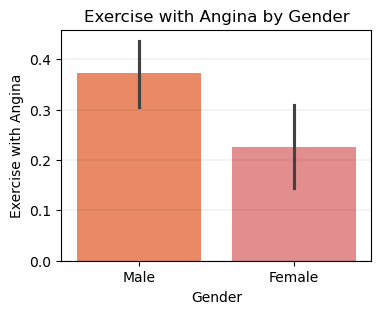

In [127]:
#Comparison of Exercise-Induced Angina Between Genders
plt.figure(figsize=(4,3))
sns.barplot(x='gender', y='exang', data=df, palette=['coral', 'lightcoral'])
plt.title("Exercise with Angina by Gender")
plt.xlabel("Gender")
plt.ylabel("Exercise with Angina")
plt.grid(axis='y', linewidth=0.3, color='black', alpha=0.2)
plt.show()

- Males exhibit a higher prevalence of exercise-induced angina, which refers to chest pain triggered by physical activity due to reduced blood flow to the heart.

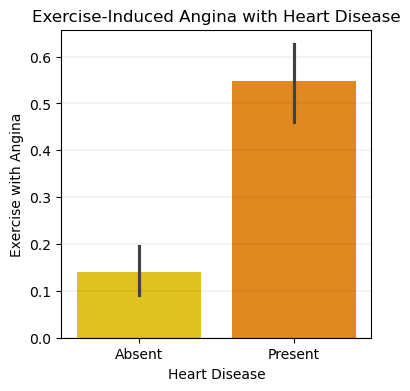

In [130]:
#Comparison of Exercise-Induced Angina and Heart Disease Status
plt.figure(figsize=(4,4))
sns.barplot(x='heart_disease_status', y='exang', data=df, palette=['gold', 'darkorange'])
plt.title("Exercise-Induced Angina with Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Exercise with Angina")
plt.grid(axis='y', linewidth=0.3, color='black', alpha=0.2)
plt.show()

- The plot shows that individuals with angina often face concerns regarding the effects of exercise on their symptoms, as engaging in physical activity may worsen their condition.

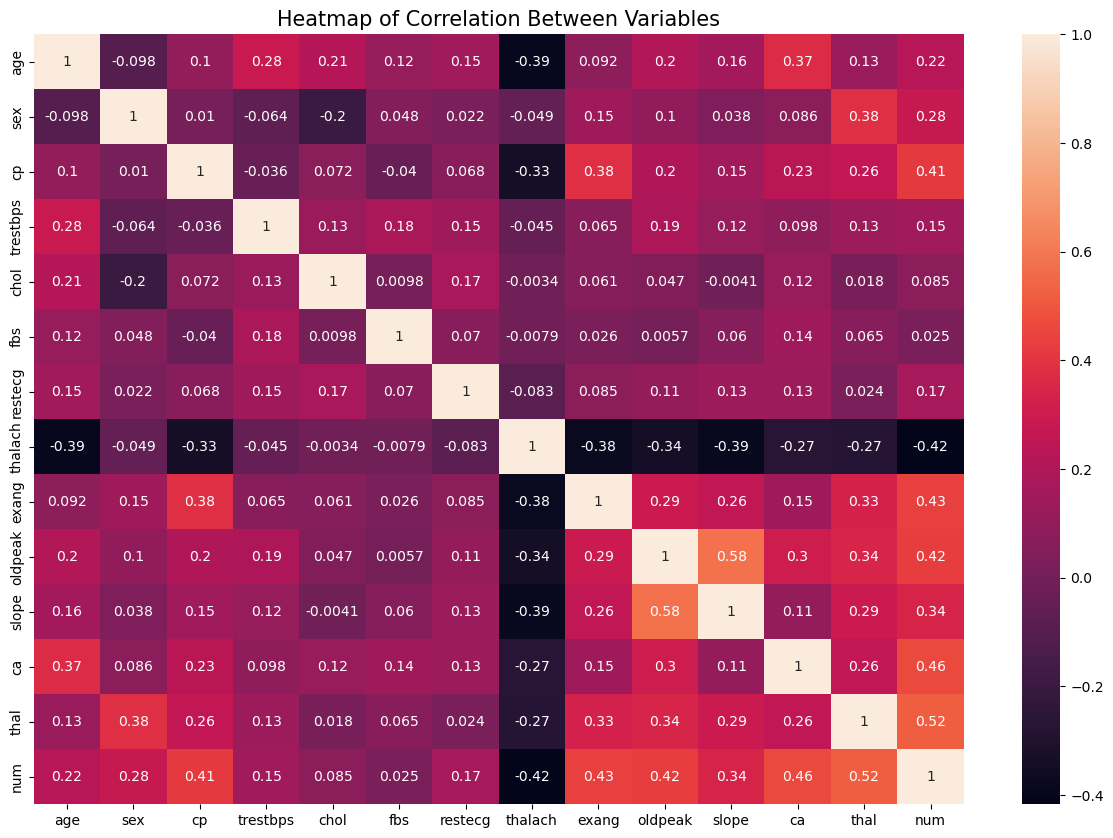

In [141]:
#Heatmap Visualization of Correlation Between Variables
plt.figure(figsize=(15,10))
sns.heatmap(df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']].corr(), annot=True)
plt.title("Heatmap of Correlation Between Variables", fontsize=15)
plt.show()

- A heatmap shows the degree of correlation between different variables in the dataset, with values ranging from -1 to 1.
    - 1 indicates a perfect positive correlation (as one variable increases, the other increases proportionally).
    - -1 indicates a perfect negative correlation (as one variable increases, the other decreases).
    - 0 suggests no linear correlation between the variables.

- Key Correlations from the Heatmap:
    - There’s a strong positive correlation between certain types of chest pain and the presence of heart disease.
    - There is a noticeable positive correlation between exercise-induced angina and heart disease presence.
    - A moderately positive correlation exists between ST depression (oldpeak) and the presence of heart disease.
    - There’s a mild positive correlation between age and the presence of heart disease.
    - There’s a moderate positive correlation between resting blood pressure and cholesterol levels.
    - There’s a strong negative correlation between maximum heart rate achieved and heart disease.

In [ ]:
# Saving the final dataset to an Excel file for further analysis and dashboarding
df.to_excel('final_heart_disease_dataset.xlsx', index=False)

# Conclusion

#### Key Insights & Recommendations

1. The Prevalence of Heart Disease:
   - *Insight:* About 45.9% of people in the dataset have heart disease, indicating a large at-risk population.
   - *Recommendation:* Regular heart check-ups should be prioritized, especially for people with high-risk factors like age and cholesterol.
2. Age-Related Trends:
   - *Insight:* People aged 55 and above are most affected by heart disease.
   - *Recommendation:* Focus preventive programs on elderly individuals, promoting lifestyle changes and regular heart monitoring.
3. Gender Differences:
   - *Insight:* Men are more likely to have heart disease, especially with silent symptoms like asymptomatic chest pain.
   - *Recommendation:* Men should be encouraged more for regular cardiac screenings, even without obvious symptoms.
4. Cholesterol & Blood Pressure Impact:
   - *Insight:* High cholesterol and blood pressure increase the risk of heart disease, particularly in older adults.
   - *Recommendation:* Lifestyle, Food habit changes and regular monitoring should be promoted for those with high cholesterol or blood pressure.
5. Exercise-Induced Angina:
   - *Insight:* Heart disease patients, especially men, experience chest pain when they exercise.
   - *Recommendation:* Proper guidance on medication and controlled activity should be given specially for those who are at risk.
6. Healthcare Programs and campaigns should be organized more for educating people about heart diseases.
7. Awareness must be raised more about silent heart disease symptoms.es.